In [2]:
import pandas as pd
import numpy as np
import keras
from keras import layers
from keras.models import Sequential, model_from_json
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from PIL import Image
import seaborn as sns
sns.set_style()
%matplotlib inline


In [3]:
print(tf.__version__)

2.12.0


In [5]:
!unzip -q '/test_w_labels.zip'

In [40]:
column_labels = ['blouse', 'dhoti_pants', 'dupattas', 'gowns', 'kurta_men', 'leggings_and_salwars', 'lehenga', 'mojaris_men',
                 'mojaris_women', 'nehru_jackets', 'palazzos', 'petticoats', 'sherwanis', 'saree', 'women_kurta']
test_dataset = image_dataset_from_directory(
    '/content/test_w_labels',
    labels='inferred',
    color_mode='grayscale',
    batch_size=128,
    image_size=(70,70),
    shuffle=False,
    class_names=column_labels)

Found 7500 files belonging to 15 classes.


In [41]:
normalization_layer = layers.Rescaling(1./255)

test_ds_norm = test_dataset.map(lambda x, y: (normalization_layer(x), y))


In [42]:
# Setting up model
img_width, img_height = 70, 70


nb_train_samples = 91166
nb_validation_samples = 7500
epochs = 200
batch_size = 128
n_classes = 15
input_shape= (img_width, img_height, 1)

In [43]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=input_shape))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(140, activation='relu'))

model.add(Dropout(0.4))

model.add(Dense(n_classes, activation='softmax'))

model.compile(loss='SparseCategoricalCrossentropy', optimizer='adam', metrics=['accuracy'])

In [44]:
model.load_weights('/content/drive/MyDrive/keras/9_27_01d.keras')

In [45]:
loss, acc = model.evaluate(test_ds_norm, y=None, verbose=2)

59/59 - 15s - loss: 0.5468 - accuracy: 0.8351 - 15s/epoch - 259ms/step


In [12]:
test_dataset = test_ds_norm.map(lambda x, y: (255*x, y))

In [13]:
y_true = []
x_test = []
for x, y in test_dataset:
    y = y.numpy()
    y_true.append(y)
    x_test.append(x)

In [14]:
y_true = [item for sublist in y_true for item in sublist]

In [15]:
len(y_true)

7500

In [16]:
y_true[0]

0

In [17]:
x_test = [item for sublist in x_test for item in sublist]

In [18]:
len(x_test)

7500

In [19]:
y_pred = model.predict(
    test_ds_norm,
    batch_size=None,
    verbose="auto",
    steps=None,
    callbacks=None,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
)

59/59 [==============================] - 15s 244ms/step


In [20]:
y_pred = y_pred.argmax(axis=1)

In [21]:
y_pred.shape

(7500,)

In [55]:
label_dict = {0:'blouse', 1:'dhoti_pants', 2:'dupattas', 3:'gowns', 4:'kurta_men', 5:'leggings_and_salwars', 6:'lehenga',
          7:'mojaris_men', 8:'mojaris_women', 9:'nehru_jackets', 10:'palazzos', 11:'petticoats', 12:'sherwanis', 13:'saree',
           14:'women_kurta'}

In [23]:
def tensor_to_image(tensor):
    tensor = np.array(tensor, dtype=np.uint8)
    tensor = np.squeeze(tensor, axis=2)
    return Image.fromarray(tensor)

In [24]:
x_test[0].shape

TensorShape([70, 70, 1])

True label: blouse. Predicted label: blouse


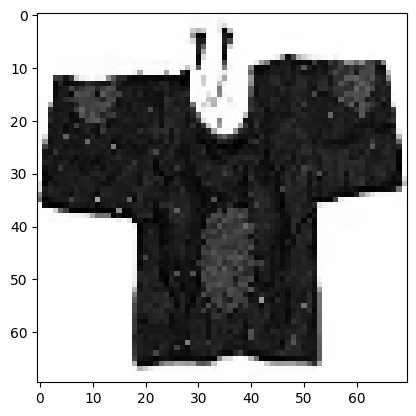

In [60]:
img = tensor_to_image(x_test[1])
plt.imshow(img, cmap='gray')
print(f'True label: {label_dict[y_true[1]]}. Predicted label: {label_dict[y_pred[1]]}')


True label: sherwanis. Predicted label: sherwanis


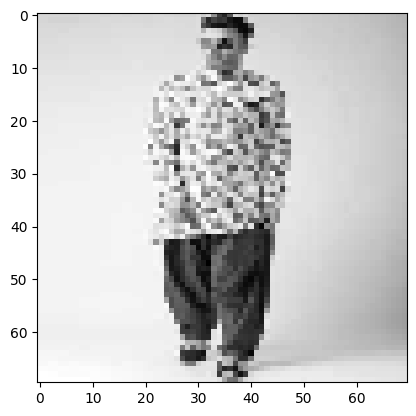

In [56]:
img = tensor_to_image(x_test[6500])
plt.imshow(img, cmap='gray')
print(f'True label: {label_dict[y_true[6500]]}. Predicted label: {label_dict[y_pred[6500]]}')

True label: dupattas. Predicted label: women_kurta


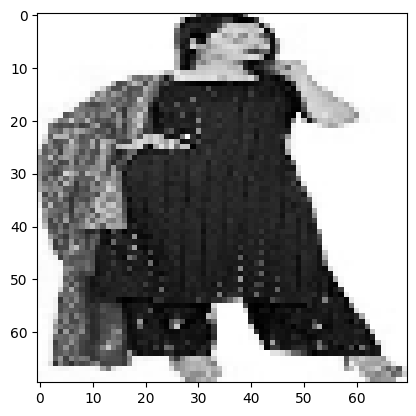

In [71]:
img = tensor_to_image(x_test[1120])
plt.imshow(img, cmap='gray')
print(f'True label: {label_dict[y_true[1120]]}. Predicted label: {label_dict[y_pred[1120]]}')

True label: dupattas. Predicted label: dupattas


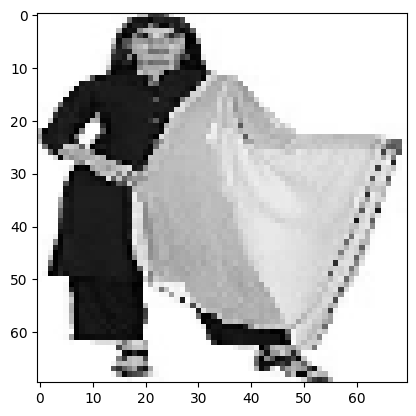

In [68]:
img = tensor_to_image(x_test[1300])
plt.imshow(img, cmap='gray')
print(f'True label: {label_dict[y_true[1300]]}. Predicted label: {label_dict[y_pred[1300]]}')

True label: women_kurta. Predicted label: women_kurta


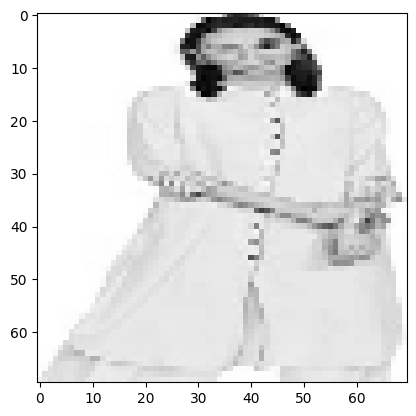

In [52]:
img = tensor_to_image(x_test[7000])
plt.imshow(img, cmap='gray')
print(f'True label: {label_dict[y_true[7000]]}. Predicted label: {label_dict[y_pred[7000]]}')


True label: saree. Predicted label: saree


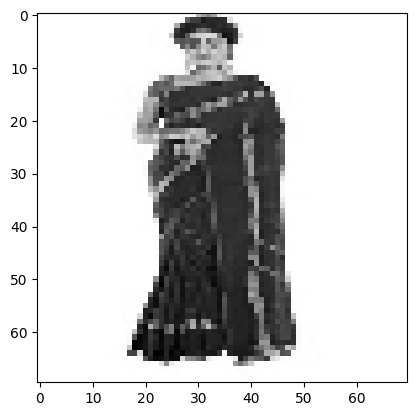

In [57]:
img = tensor_to_image(x_test[6000])
plt.imshow(img, cmap='gray')
print(f'True label: {label_dict[y_true[6000]]}. Predicted label: {label_dict[y_pred[6000]]}')

In [30]:
cm = confusion_matrix(y_true, y_pred)
cm

array([[478,   0,   6,   1,   0,   0,   1,   1,   3,   1,   0,   3,   0,
          5,   1],
       [  5, 334,  11,   1,   9,  52,   1,   3,   1,   2,   8,   9,   5,
          4,  55],
       [  9,   1, 321,  19,   1,  23,  11,   0,   2,   2,   0,   4,   1,
         21,  85],
       [  3,   4,  14, 279,   1,   2,  23,   0,   0,   2,   2,   5,   2,
         11, 152],
       [  0,   4,   1,   0, 468,   0,   0,   0,   0,   8,   1,   0,  16,
          0,   2],
       [  0,  19,   8,   1,   1, 439,   0,   0,   1,   0,  24,   4,   0,
          1,   2],
       [  1,   0,   2,  16,   0,   1, 471,   0,   0,   0,   3,   1,   1,
          2,   2],
       [  5,   1,   6,   0,   0,   0,   1, 415,  60,   0,   0,   2,   4,
          6,   0],
       [  5,   0,   3,   1,   1,   3,   0,  69, 412,   0,   0,   0,   2,
          4,   0],
       [  0,   1,   3,   0,  15,   2,   0,   0,   0, 467,   1,   1,   9,
          1,   0],
       [  0,   2,   0,   0,   0,  75,   9,   0,   0,   0, 402,   7,   0,
       

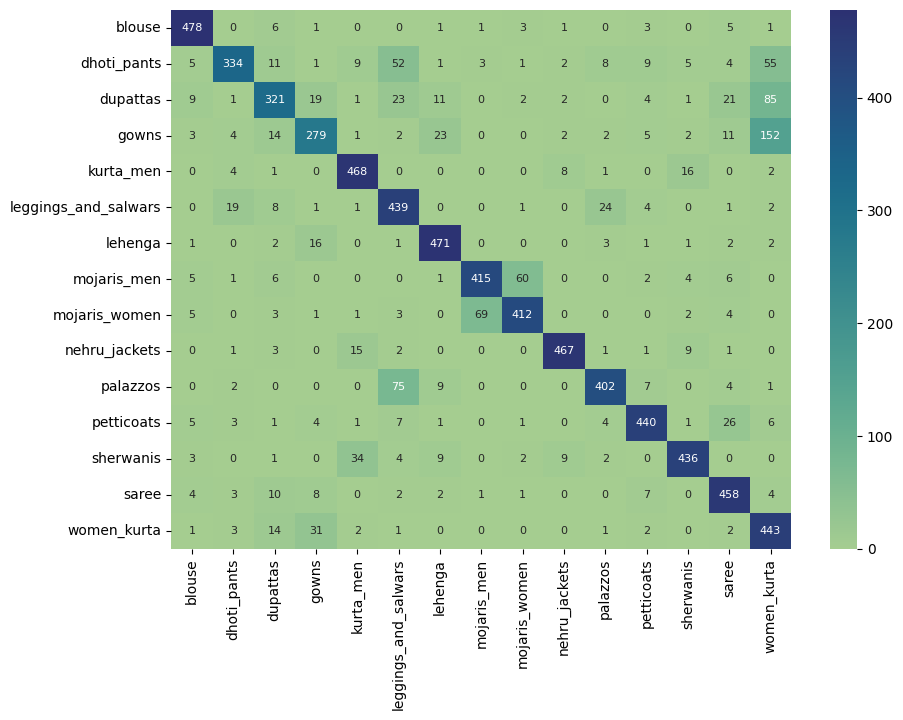

In [72]:
df_cm = pd.DataFrame(cm, index = ['blouse', 'dhoti_pants', 'dupattas', 'gowns', 'kurta_men', 'leggings_and_salwars', 'lehenga', 'mojaris_men', 'mojaris_women', 'nehru_jackets', 'palazzos', 'petticoats', 'sherwanis', 'saree', 'women_kurta'],
                  columns = ['blouse', 'dhoti_pants', 'dupattas', 'gowns', 'kurta_men', 'leggings_and_salwars', 'lehenga', 'mojaris_men', 'mojaris_women', 'nehru_jackets', 'palazzos', 'petticoats', 'sherwanis', 'saree', 'women_kurta'])
plt.figure(figsize = (10,7))
_ = sns.heatmap(df_cm, annot=True, annot_kws={"size":8}, fmt='d', cmap='crest')